In [16]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
# Load and prepare the data
# Sample data creation (replace with your actual dataset)
data = {
    'CustomerID': range(1, 201),
    'Age': np.random.randint(18, 70, 200),
    'Annual_Income': np.random.randint(15000, 150000, 200),
    'Spending_Score': np.random.randint(1, 100, 200)
}
df = pd.DataFrame(data)

In [19]:
# Selecting features for clustering
X = df[['Annual_Income', 'Spending_Score']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

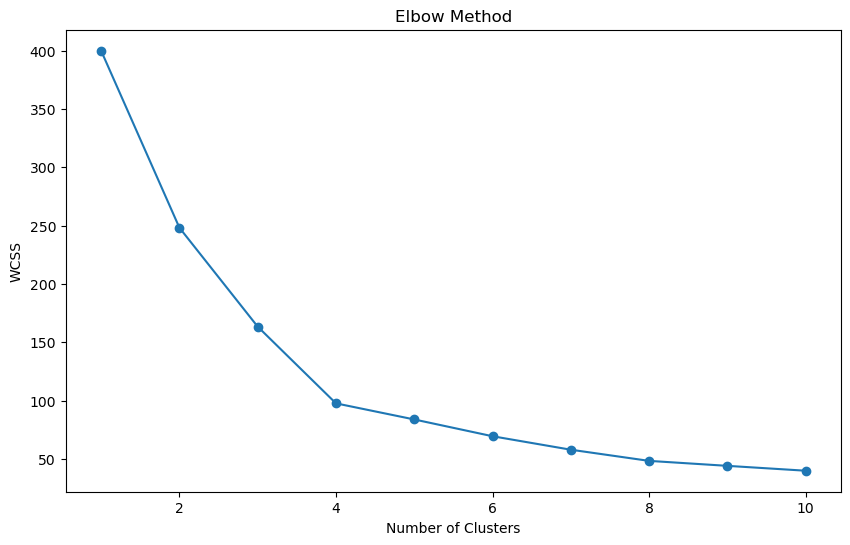

In [21]:
# Plotting elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [22]:
# Applying K-means clustering with optimal clusters (k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


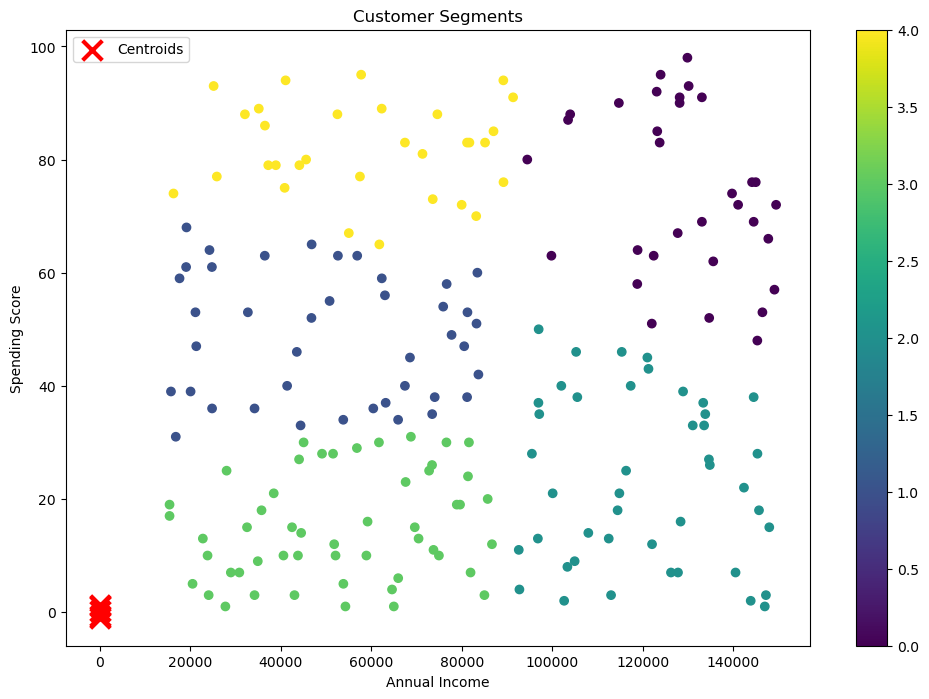

In [23]:
# Visualizing the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='x', s=200, linewidth=3, label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.colorbar(scatter)
plt.show()

In [24]:
# Analyzing the clusters
df['Cluster'] = y_kmeans
print("\nCluster Analysis:")
print(df.groupby('Cluster').mean())


Cluster Analysis:
         CustomerID        Age  Annual_Income  Spending_Score
Cluster                                                      
0         81.062500  46.437500  128891.625000       74.218750
1        111.463415  42.073171   50905.317073       48.609756
2        101.977273  48.500000  120100.659091       23.090909
3        102.000000  44.000000   53275.615385       15.000000
4        101.451613  45.032258   58723.193548       81.806452
